<a href="https://colab.research.google.com/github/kdhqwe1030/2025-1-CV/blob/main/Homework%232/2025_1_CV_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW#2


## 이미지 다운로드

In [ ]:
!wget -O HW2-1.tif "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif"
!wget -O HW2-2.tif "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif"

!wget -O HW2-4.jpg "https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg"
!wget -O HW2-5.jpg "https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg"
!wget -O HW2-6.tif "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif"
!wget -O HW2-7.tif "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif"
!wget -O HW2-8.tif "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif"
!wget -O HW2-9.tif "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif"
!wget -O HW2-10.tif "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif"

--2025-04-11 10:24:16--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘HW2-1.tif’

HW2-1.tif           100%[===================>] 575.31K  --.-KB/s    in 0.01s   

2025-04-11 10:24:16 (51.6 MB/s) - ‘HW2-1.tif’ saved [589115/589115]

--2025-04-11 10:24:16--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

---
## HW2-1

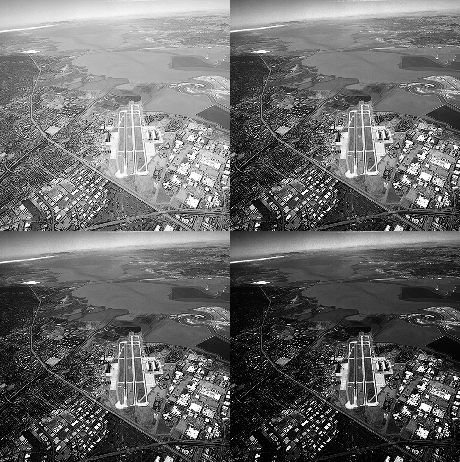

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
img = cv.imread('HW2-1.tif')
img = cv.resize(img, dsize=(0, 0), fx=0.3, fy=0.3)


# 감마 값 적용
def gamma(f, gamma=1.0):
    f1 = f / 255.0
    return np.uint8(255 * (f1 ** gamma))

img1 = gamma(img, 2)
img2 = gamma(img, 4.0)
img3 = gamma(img, 5.0)
img4 = gamma(img, 8.0)
# 감마값이 증가함에따라 어두워진다는 사실을 알 수 있다.



# 이미지 붙이기/ 결과 출력
row1 = np.hstack((img1, img2))
row2 = np.hstack((img3, img4))
gc = np.vstack((row1, row2))

cv2_imshow(gc)
cv.waitKey(0)
cv.destroyAllWindows()

---
# HW#2-2


- 첫번째 1과 0을 통한 하단, 중단, 상단 과정을 파악하는 과정에서 구간을 나누는 것이 중요하다고 판단.
- 두번째 시도에서 히스토그램을 통해 구간을 파악
- 히스토그램에서 파악한 구간을 통해 여러 구간 여러 값으로 시도.
- 과제 예시와 가장 예시한 시도는 이미지 마지막 줄에 추가

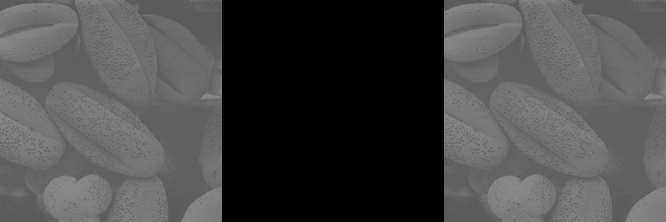

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
img = cv.imread('HW2-2.tif')
img = cv.resize(img, dsize=(0, 0), fx=0.25, fy=0.25)

def piecewise_linear(img,a,b,c):    # 각 파라미터 a,b,c를 통해 밝기 조절 함수 구현

    result = np.zeros_like(img)     # 원본과 동일한 크기의 배열 생성


    # 구간 1: 0 ~ 70
    mask1 = img <= 70
    result[mask1] = (img[mask1] * a).astype(np.uint8)

    # 구간 2: 71 ~ 140
    mask2 = (img > 70) & (img <= 140)
    result[mask2] = (img[mask2] * b).clip(0, 255).astype(np.uint8)

    # 구간 3: 141 ~ 255
    mask3 = img > 140
    result[mask3] = (img[mask3] * c).clip(0, 255).astype(np.uint8)

    return result

gc=np.hstack((piecewise_linear(img,1,1,1),piecewise_linear(img,1,0,1),piecewise_linear(img,1,1,0)))
cv2_imshow(gc)

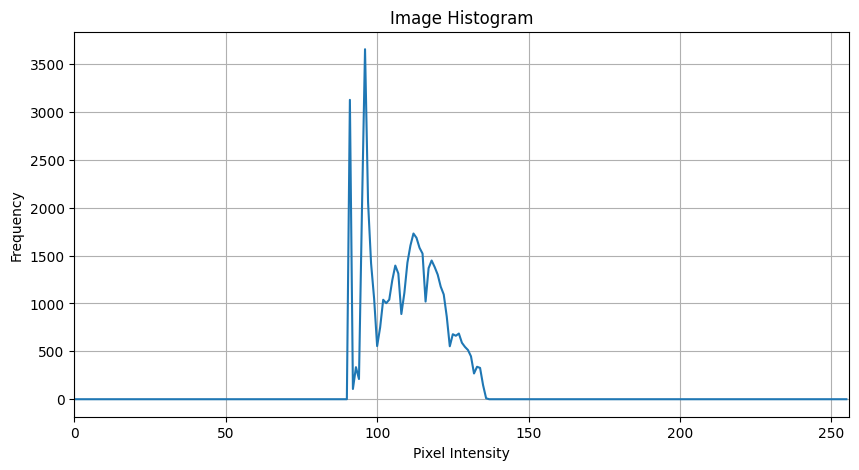

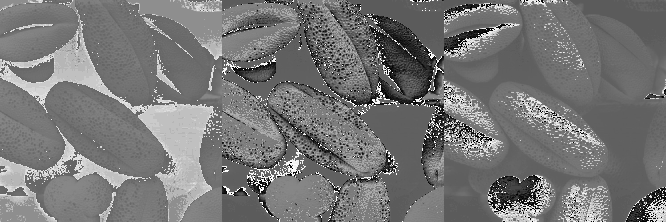

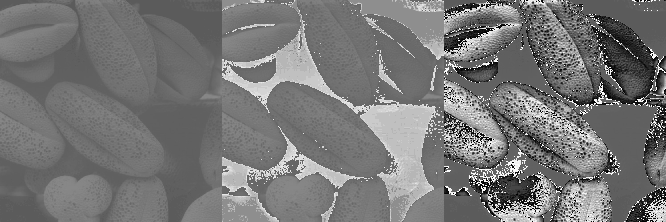

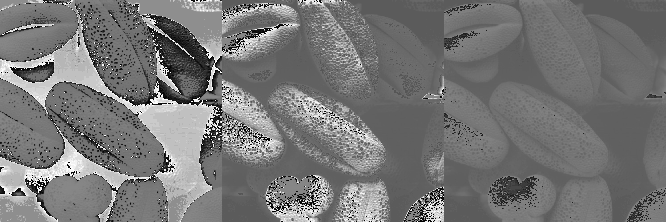

-----------------------------------------------------------------------------------


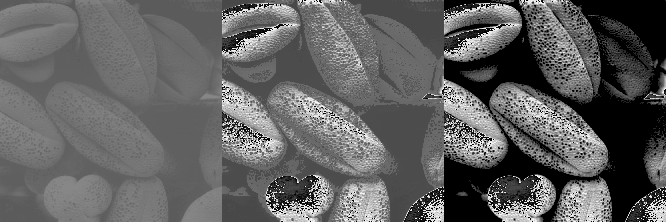

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img = cv.imread('HW2-2.tif')
img = cv.resize(img, dsize=(0, 0), fx=0.25, fy=0.25)


# 첫번째 시도에서 구간을 잡는것이 중요하다고 판단되어, 색상에 대한 정보를 알기위한 히스토그램 확인
def show_histogram(img):
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.figure(figsize=(10, 5))
    plt.plot(hist)
    plt.title('Image Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.grid(True)
    plt.show()

show_histogram(img)     # 결과에서 대략 80~ 130사이에만 값이 존재하며, 80~110사이에 많은 값이 존재한다는 것을 판단

def piecewise_linear(img, a, b, c, t1=100, t2=120):
    """
    사용자 정의 임계값으로 구간별 선형 변환 적용

    매개변수:
    - img: 입력 이미지
    - a, b, c: 각 구간의 스케일링 계수
    - t1, t2: 구간을 구분하는 임계값
    """
    result = np.zeros_like(img)

    # 구간 1: 0 ~ t1
    mask1 = img <= t1
    result[mask1] = (img[mask1] * a).clip(0, 255).astype(np.uint8)

    # 구간 2: t1+1 ~ t2
    mask2 = (img > t1) & (img <= t2)
    result[mask2] = (img[mask2] * b).clip(0, 255).astype(np.uint8)

    # 구간 3: t2+1 ~ 255
    mask3 = img > t2
    result[mask3] = (img[mask3] * c).clip(0, 255).astype(np.uint8)

    return result


gc1 = np.hstack((
    piecewise_linear(img, 10, 1, 1),  # 하단 강조
    piecewise_linear(img, 1, 10, 1),  # 중단 강조
    piecewise_linear(img, 1, 1, 10)   # 상단 강조
))
cv2_imshow(gc1)

#구간변경 0~90, 90~100, 100~
gc2 = np.hstack((
    piecewise_linear(img, 10, 1, 1, t1=90, t2=100),   # 하단 강조
    piecewise_linear(img, 1, 10, 1,  t1=90, t2=100),  # 중단 강조
    piecewise_linear(img, 1, 1, 10,  t1=90, t2=100)   # 상단 강조
))
cv2_imshow(gc2)

#구간변경 0~110, 110~130, 130~
gc3 = np.hstack((
    piecewise_linear(img, 10, 1, 1, t1=110, t2=130),    # 하단 강조
    piecewise_linear(img, 1, 10, 1,  t1=110, t2=130),   # 중단 강조
    piecewise_linear(img, 1, 1, 10,  t1=110, t2=130)    # 상단 강조
))
cv2_imshow(gc3)

print("-----------------------------------------------------------------------------------")

#구간변경과 강조를 통한 적절한 이미지 생성
gc4 = np.hstack((
    piecewise_linear(img, 1,1,1),    # 원본
    piecewise_linear(img, 0.8, 1, 10,  t1=100, t2=110),
    piecewise_linear(img, 0, 0, 10,  t1=90, t2=105),
))
cv2_imshow(gc4)

---
## HW#2-3


필터1(모두 1/9), 필터2(가우시안), 필터3(라플라시안)


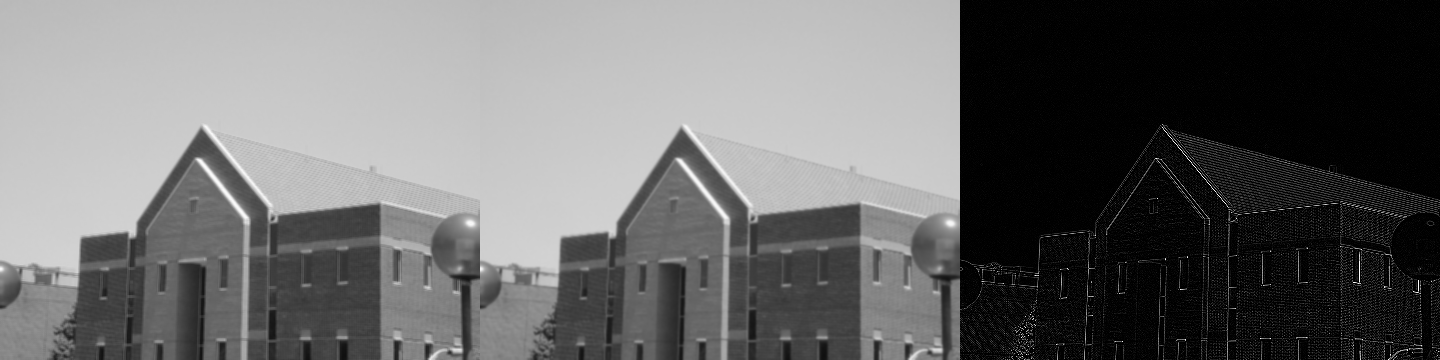





 필터4, 필터5, 필터6


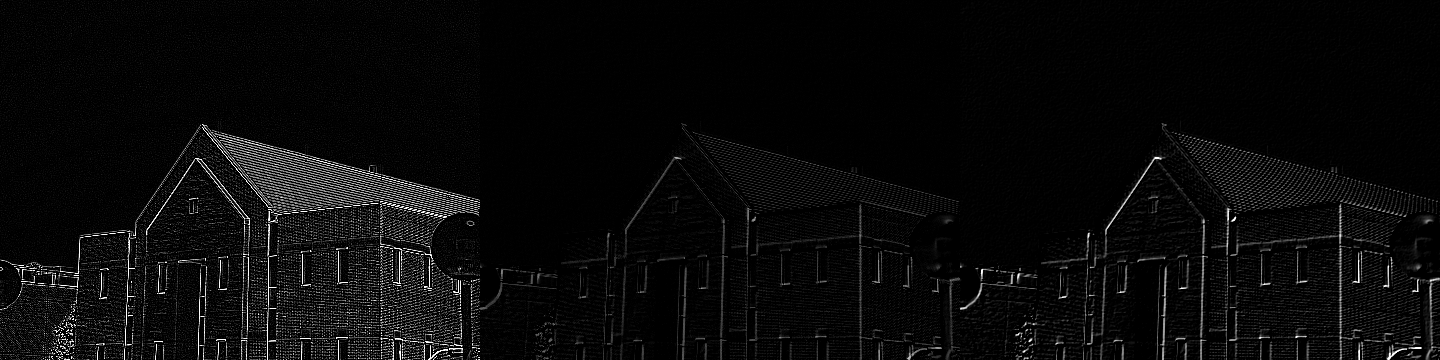

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


img = cv.imread('HW2-4.jpg')        # 4번 이미지를 사용
img=cv.resize(img,dsize=(0,0),fx=0.3,fy=0.3)

# 마스크 정의
filter1 = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])
filter2 = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
])
filter3 = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])
filter4 = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])
filter5 = np.array([
    [-1,0,0],
    [0,0,0],
    [0,0,1]
])
filter6 = np.array([
    [-1,-1,0],
    [-1,0,1],
    [0,1,1]
])

# 각 필터 적용
result1 = cv.filter2D(img, -1, filter1)
result2 = cv.filter2D(img, -1, filter2)
result3 = cv.filter2D(img, -1, filter3)
result4 = cv.filter2D(img, -1, filter4)
result5 = cv.filter2D(img, -1, filter5)
result6 = cv.filter2D(img, -1, filter6)

# 결과를 두 행으로 나누어 표시
row1 = np.hstack((result1, result2,result3))
row2 = np.hstack((result4, result5,result6))

# 결과 표시
print("\n필터1(모두 1/9), 필터2(가우시안), 필터3(라플라시안)")
cv2_imshow(row1)

print("\n\n\n\n 필터4, 필터5, 필터6")
cv2_imshow(row2)

# 필터링 결과 분석
# 가우시안 필터 (좌측 필터):
# - 중심부에 높은 가중치(0.1621)를 두고 주변으로 갈수록 낮아지는 형태
# - 이미지가 부드러워지고 노이즈가 감소하는 효과가 나타남

# 대칭성 필터 1 (중앙 필터):
# - 중앙에 양수값(4, 8)을 두고 주변에 -1 배치한 라플라시안 형태
# - 이미지의 경계가 강조되고 대비가 증가
# - 건물의 윤곽선, 창문, 지붕 등의 선이 더 뚜렷해짐

# 대칭성 필터 2 (우측 필터):
# - -1과 1의 배치로 특정 방향의 변화 감지
# - 특정 방향(대각선)의 에지만 강조됨
# - 건물의 특정 각도 선이나 모서리가 두드러지게 보임

# - 각 필터마다 이미지에 다른 효과를 줌
# - 가우시안: 노이즈 제거, 부드러운 효과
# - 라플라시안: 모든 방향 경계 강조
# - 방향성 필터: 특정 방향 경계만 강조

---
## HW#2-4
- row2에 있는 sobel_45와 sobel_135는 에지의 강도를 보여주는 그레이스케일 이미지인 반면, row3에 있는 mask_45와 mask_135는 임계값(threshold=50)을 적용하여 생성한 이진화 이미지이다.
- row2는 에지 강도의 연속적인 값을 보여주고, row3는 임계값보다 강한 에지만 흰색으로 표시하고 나머지는 검은색으로 표시하는 이진화된 결과를 보여준다.


 원본 그레이스케일,수평 에지 (Sobel X),수직 에지 (Sobel Y)


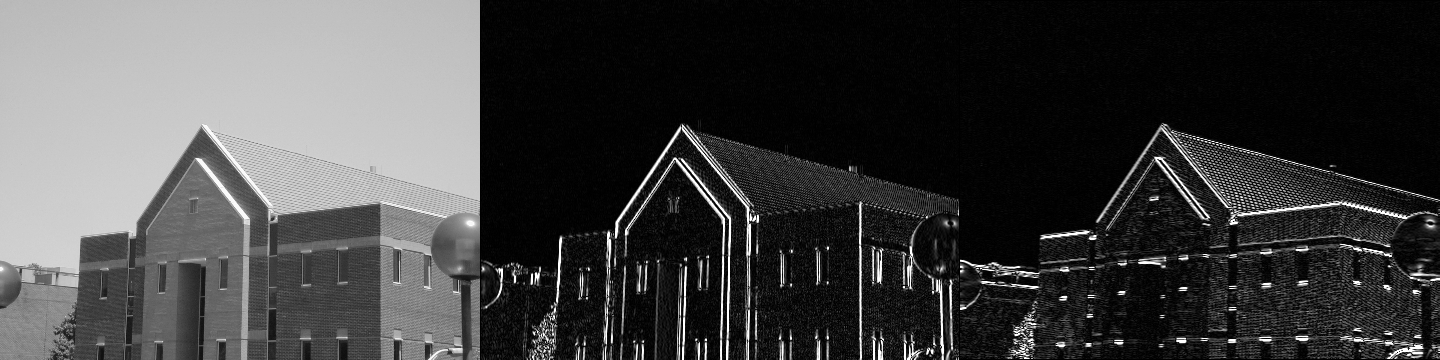


 45도 방향 에지, -45도 방향 에지,전체 에지 강도


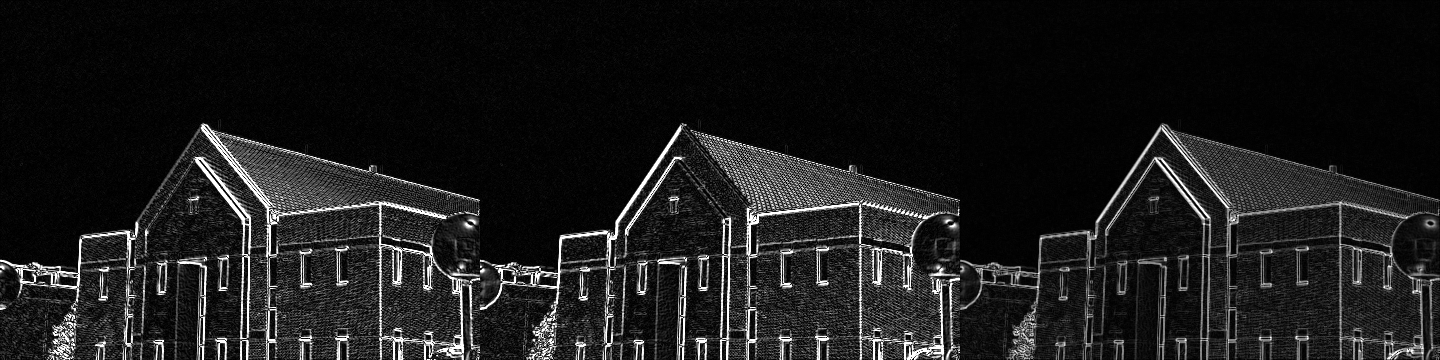


 45도 방향 에지 마스크, -45도 방향 에지 마스크


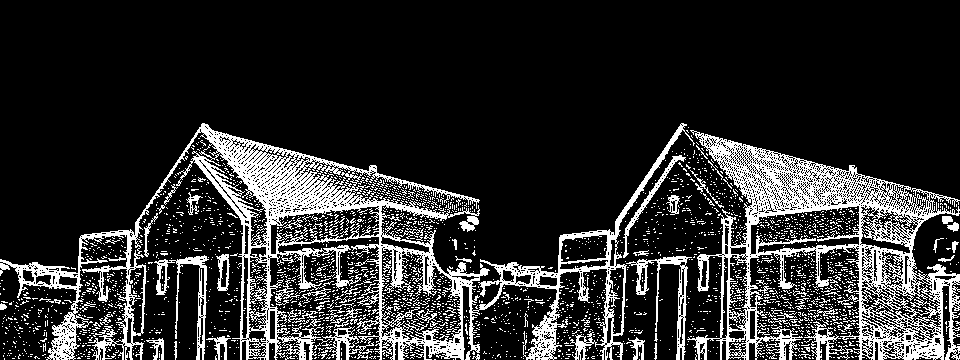

In [ ]:
import cv2 as cv
import numpy as np


# 이미지 읽기
img = cv.imread('HW2-4.jpg')
img = cv.resize(img, dsize=(0,0), fx=0.3, fy=0.3)

# K가 1인 경우 거의 지붕 대각선만 보이지만, 3정도 되면 전반적으로 보임
grad_x = cv.Sobel(img, cv.CV_32F, 1, 0, ksize=3)
grad_y = cv.Sobel(img, cv.CV_32F, 0, 1, ksize=3)

# 45도와 -45도 방향의 에지 검출
grad_45 = grad_y - grad_x  # 45도 방향 (우상향)
grad_135 = grad_y + grad_x  # -45도 방향 (좌상향)

# 절대값을 취해 양수 영상으로 변환
sobel_x = cv.convertScaleAbs(grad_x)
sobel_y = cv.convertScaleAbs(grad_y)
sobel_45 = cv.convertScaleAbs(grad_45)
sobel_135 = cv.convertScaleAbs(grad_135)


edge_strength = cv.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0) # 에지 강도 계산


# 이미지 출력
print("\n 원본 그레이스케일,수평 에지 (Sobel X),수직 에지 (Sobel Y)")
row1 = np.hstack((img, sobel_x,sobel_y))
cv2_imshow(row1)
print("\n 45도 방향 에지, -45도 방향 에지,전체 에지 강도")
row2 = np.hstack((sobel_45,sobel_135,edge_strength))
cv2_imshow(row2)



threshold = 50 # 임계값 설정

# 45도 에지 마스크, -45도 에지 마스크
mask_45 = np.zeros_like(img)
mask_45[sobel_45 > threshold] = 255

mask_135 = np.zeros_like(img)
mask_135[sobel_135 > threshold] = 255

# 마스크 적용 결과 출력
print("\n 45도 방향 에지 마스크, -45도 방향 에지 마스크")
row3=np.hstack((mask_45,mask_135))
cv2_imshow(row3)



---

# HW#2-5
- 3x3 사각형 구조요소 닫힘을 통해 제거가 잘 안됨.
- 배열 사이즈가 문제라고 생각하여 배열 사이즈를 키워봤지만 안됨
- 침식-팽창 조합으로 만들어지는 닫힘, 열림 연산 뿐만아니라 닫힙과 열림 두개의 조합으로 실행


n원본 이진화 이미지, 모폴로지 닫힘 연산 후, 더 큰 구조요소(5x5)로 모폴로지 닫힘 연산 후


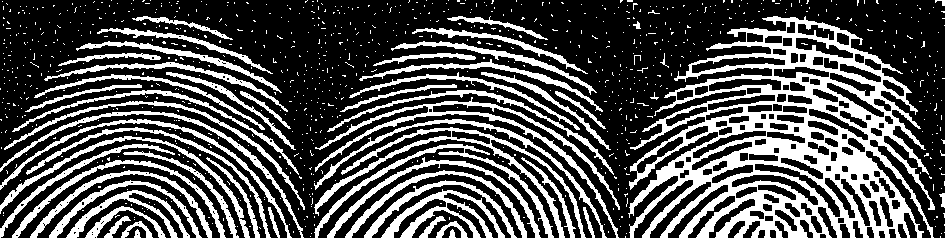


열림 후 닫힘 연산 결과, 닫힘 후 열림 연산 결과


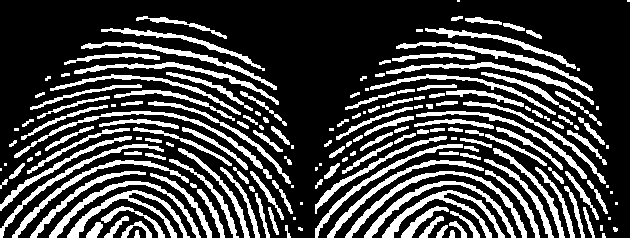

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기
img = cv.imread('HW2-5.jpg', cv.IMREAD_GRAYSCALE)


_, bin_img = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # 이미지 이진화


# 구조 요소 정의
se = np.ones((3, 3), np.uint8)  # 3x3 사각형 구조요소

# 모폴로지 닫힘 연산 적용 (닫힘 = 팽창 후 침식)
# 닫힘 연산은 작은 구멍을 채우고 객체의 윤곽을 부드럽게 만듭니다
closing = cv.morphologyEx(bin_img, cv.MORPH_CLOSE, se)



# 필요에 따라 추가 개선을 위한 파라미터 조정
# 더 좋은 결과를 위한 구조 요소 크기 변경 시도
se_larger = np.ones((5, 5), np.uint8)
closing_larger = cv.morphologyEx(bin_img, cv.MORPH_CLOSE, se_larger)


# 더 나은 결과를 위해 열림-닫힘 조합 적용 (노이즈 제거 후 구멍 채우기)
opening = cv.morphologyEx(bin_img, cv.MORPH_OPEN, se)  # 작은 노이즈 제거
closing_after_opening = cv.morphologyEx(opening, cv.MORPH_CLOSE, se)  # 구멍 채우기


# 더 나은 결과를 위해 닫힘-열림 조합 적용 (역순)
closing = cv.morphologyEx(bin_img, cv.MORPH_CLOSE, se)  # 작은 노이즈 제거
opening_after_opening = cv.morphologyEx(closing,cv.MORPH_OPEN , se)  # 구멍 채우기



print("\nn원본 이진화 이미지, 모폴로지 닫힘 연산 후, 더 큰 구조요소(5x5)로 모폴로지 닫힘 연산 후")
row1 = np.hstack((bin_img, closing,closing_larger))
cv2_imshow(row1)

print("\n열림 후 닫힘 연산 결과, 닫힘 후 열림 연산 결과")
cv2_imshow(np.hstack((closing_after_opening, opening_after_opening)))



cv.waitKey(0)
cv.destroyAllWindows()

---
# HW#2-6


- `se = np.ones((3, 3), np.uint8)` 로 시도했을 경우 세로 선은 그대로 남게됨.
- 십자 모양의 5x5 구조 요소 사용을 통해  방사형으로 뻗은 선분을 효과적으로 제거.
- 침식 연산은, 구조 요소가 완전히 포함되지 않는 영역을 제거하는 원리로 작동.
- 선분의 폭이 좁아 구조 요소가 완전히 들어가지 못하므로 선분이 제거
- 반면, 중앙 사각형은 구조 요소보다 충분히 크기 때문에 일부 크기가 줄어들긴 하지만 완전히 사라지지 않음.




원본 이진화 이미지


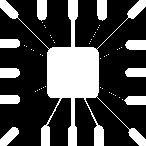


침식(erode) 연산 후


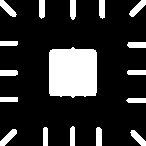

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기
img = cv.imread('HW2-6.tif', cv.IMREAD_GRAYSCALE)
img = cv.resize(img, dsize=(0,0), fx=0.3, fy=0.3)   # 이미지 크기가 커진다면,
t, bin_img = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU) # 이진화


# 구조 요소 정의
se = np.uint8([[0,0,1,0,0],
             [0,1,1,1,0],
             [1,1,1,1,1],
             [0,1,1,1,0],
             [0,0,1,0,0]])

# 원본 이진화 이미지 출력
print("\n원본 이진화 이미지")
cv2_imshow(bin_img)
cv.waitKey(0)

# 침식 연산 적용
eroded_img = cv.erode(bin_img, se, iterations=1)

# 침식 결과 출력
print("\n침식(erode) 연산 후")
cv2_imshow(eroded_img)
cv.waitKey(0)

cv.destroyAllWindows()

---
# HW#2-7


- Sobel을 처음엔 단일 방향으로만 적용했으나 x, y축 그라디언트 결합 및 방향별(0°, 45°, 90°, 135°) 분석 추가로 더 많은 정보를 획득함.
- 예상과 달리 의학 영상에서는 Canny보다 Sobel이 두개골과 뇌 조직 경계가 더 잘 보이기도함.

원본 이미지


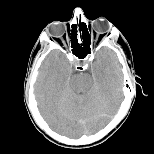


Sobel 전체 에지


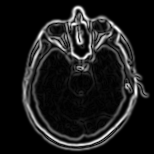


방향별 Sobel 에지 (0도, 45도, 90도, 135도)


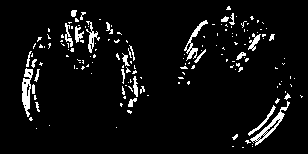

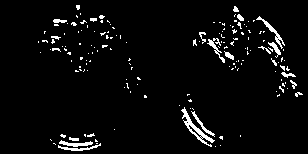


Laplacian 에지


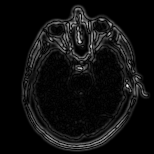


Canny 에지


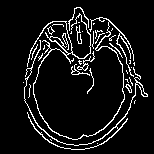


Morphological Gradient


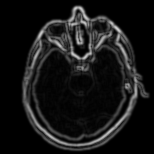


모든 방법 비교 (원본, Sobel, Laplacian, Canny, Morphological Gradient)


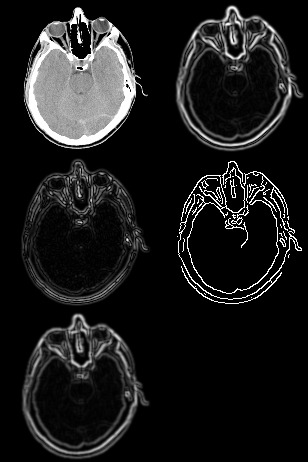

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기
img = cv.imread('HW2-7.tif', cv.IMREAD_GRAYSCALE)  # 의학 영상은 그레이스케일로 처리
img = cv.resize(img, dsize=(0,0), fx=0.3, fy=0.3)

# 약간의 노이즈 제거를 위한 가우시안 블러 적용 (선택적)
blurred = cv.GaussianBlur(img, (5, 5), 0)

# 1. Sobel 에지 검출
grad_x = cv.Sobel(blurred, cv.CV_32F, 1, 0, ksize=3)
grad_y = cv.Sobel(blurred, cv.CV_32F, 0, 1, ksize=3)

# 소벨 에지 강도 계산
sobel_magnitude = cv.magnitude(grad_x, grad_y)
sobel_magnitude = cv.normalize(sobel_magnitude, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

# 소벨 방향 계산
sobel_direction = cv.phase(grad_x, grad_y, angleInDegrees=True)

# 각도별 에지 검출 (0도, 45도, 90도, 135도)
mask_0 = np.zeros_like(img)
mask_45 = np.zeros_like(img)
mask_90 = np.zeros_like(img)
mask_135 = np.zeros_like(img)

threshold = 50  # 임계값 설정

for i in range(sobel_direction.shape[0]):
    for j in range(sobel_direction.shape[1]):   #모든 픽셀 순회
        if sobel_magnitude[i, j] > threshold:           #임계값을 넘는다면
            angle = sobel_direction[i, j] % 180   # 엣지는 양방향성이기 때문에 180도만 확인
            # 각도에 따른 더 맞는 엣지로 분류
            if (0 <= angle < 22.5) or (157.5 <= angle < 180):
                mask_0[i, j] = 255
            elif 22.5 <= angle < 67.5:
                mask_45[i, j] = 255
            elif 67.5 <= angle < 112.5:
                mask_90[i, j] = 255
            elif 112.5 <= angle < 157.5:
                mask_135[i, j] = 255

# 2. Laplacian 에지 검출
laplacian = cv.Laplacian(blurred, cv.CV_32F, ksize=3)
laplacian = cv.normalize(np.abs(laplacian), None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

# 3. Canny 에지 검출
canny = cv.Canny(blurred, 50, 150)

# 4. Morphological Gradient
kernel = np.ones((3, 3), np.uint8)
morph_gradient = cv.morphologyEx(blurred, cv.MORPH_GRADIENT, kernel)

# 결과 출력
print("원본 이미지")
cv2_imshow(img)

print("\nSobel 전체 에지")
cv2_imshow(sobel_magnitude)

print("\n방향별 Sobel 에지 (0도, 45도, 90도, 135도)")
row1 = np.hstack((mask_0, mask_45))
row2 = np.hstack((mask_90, mask_135))
cv2_imshow(row1)
cv2_imshow(row2)

print("\nLaplacian 에지")
cv2_imshow(laplacian)

print("\nCanny 에지")
cv2_imshow(canny)

print("\nMorphological Gradient")
cv2_imshow(morph_gradient)

# 모든 방법 비교
all_methods = np.vstack((
    np.hstack((img, sobel_magnitude)),
    np.hstack((laplacian, canny)),
    np.hstack((morph_gradient, np.zeros_like(img)))
))
print("\n모든 방법 비교 (원본, Sobel, Laplacian, Canny, Morphological Gradient)")
cv2_imshow(all_methods)

---
# HW#2-8

- 처음에 (3,3) 커널 크기로 시도했으나 노이즈 제거 효과가 미미하여 (9,9)로 커널 크기를 증가시킴.
- 그리고 사진 크기를 축소시킴에 따라 커널 크기가 (9,9)로 유지된 상태에는 너무 뭉개져서 다시 (3,3)크기로 커널을ㄹ 축소시킴
- Smoothing Filter(가우시안)은 거의 노이즈를 제거 못하였지만, Morphological Smoothing은 생각보다 노이즈를 효과적으로 제거하였다.

원본 이미지


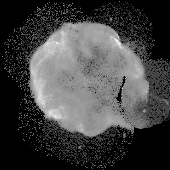

Smoothing Filter (가우시안)


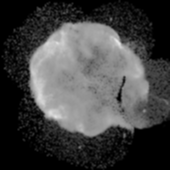

Morphological Smoothing (Opening+Closing)


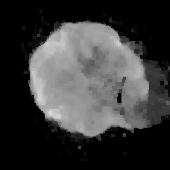

원본 vs Smoothing Filter vs Morphological Smoothing


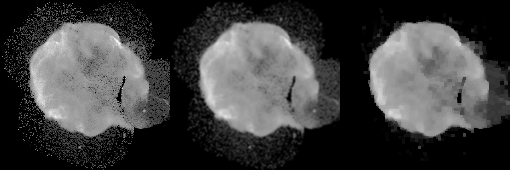

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기
img = cv.imread('HW2-8.tif')
img = cv.resize(img, dsize=(0,0), fx=0.3, fy=0.3)
# 원본 이미지 출력
print("원본 이미지")
cv2_imshow(img)

# 1. Smoothing Filter 적용 (노이즈 제거를 위한 일반적인 필터)
smoothed = cv.GaussianBlur(img, (3,3), 0)
print("Smoothing Filter (가우시안)")
cv2_imshow(smoothed)

# 2. Morphological Smoothing 적용
kernel = np.ones((3,3), np.uint8)
morph_smoothed = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)  #  작은 밝은 노이즈를 제거
morph_smoothed = cv.morphologyEx(morph_smoothed, cv.MORPH_CLOSE, kernel) # 작은 어두운 노이즈를 제거
print("Morphological Smoothing (Opening+Closing)")
cv2_imshow(morph_smoothed)

# 결과 비교
comparison = np.hstack((img, smoothed, morph_smoothed))
print("원본 vs Smoothing Filter vs Morphological Smoothing")
cv2_imshow(comparison)

---
# HW#2-9

- 단순 임계값 이진화는 전체 이미지에 고정 임계값을 처리하기 때문에, 객체 추출이 부정확함.
- Top-Hat 변환은 원본에서 Opening 연산 결과를 빼는 방식이기에, 이후 이진화 시 객체 구분이 더 명확해지는 것으로 보임.

방법 1: 단순 임계값 이진화


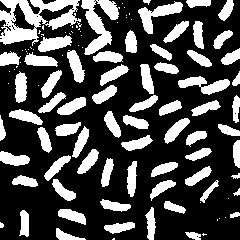

Top-Hat 변환 결과


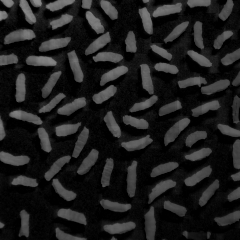

방법 2: Top-Hat 변환 후 이진화


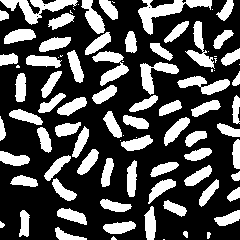

원본 vs 단순 이진화 vs Top-Hat+이진화


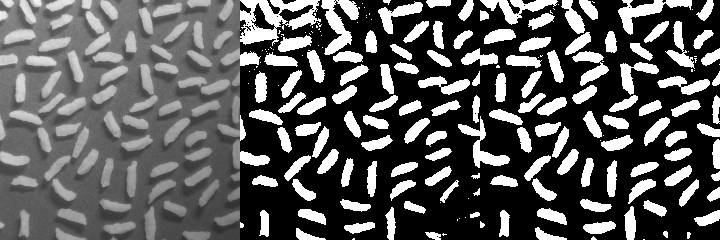

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기
img = cv.imread('HW2-9.tif')
img = cv.resize(img, dsize=(0,0), fx=0.4, fy=0.4)


# 방법 1: 단순 임계값 이진화
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)  # 이진화
print("방법 1: 단순 임계값 이진화")
cv2_imshow(thresh1)

# 방법 2: Top-Hat 변환 후 이진화
kernel = np.ones((15, 15), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)# Top-Hat 변환 적용 (원본 이미지 - Opening)

print("Top-Hat 변환 결과")
cv2_imshow(tophat)


ret, thresh2 = cv.threshold(tophat, 30, 255, cv.THRESH_BINARY)  # 이진화
print("방법 2: Top-Hat 변환 후 이진화")
cv2_imshow(thresh2)

# 결과 비교
comparison = np.hstack((img, thresh1, thresh2))
print("원본 vs 단순 이진화 vs Top-Hat+이진화")
cv2_imshow(comparison)

---
# HW#2-10

- 여러 커널 크기 시도함. (40,40) 커널로 닫힘 연산해 작은 얼룩 결합.
- (134,134) 커널로 열림 연산 적용. 큰 얼룩만 남김.
- (4,4) 커널로 형태학적 기울기 연산 수행. 경계선 추출.
- 추출된 경계선(img4)과 원본 이미지(img)를 결합하여 최종 결과(result4)를 생성함으로써 원본 이미지 위에 얼룩 크기에 따른 경계선을 효과적으로 표현함.

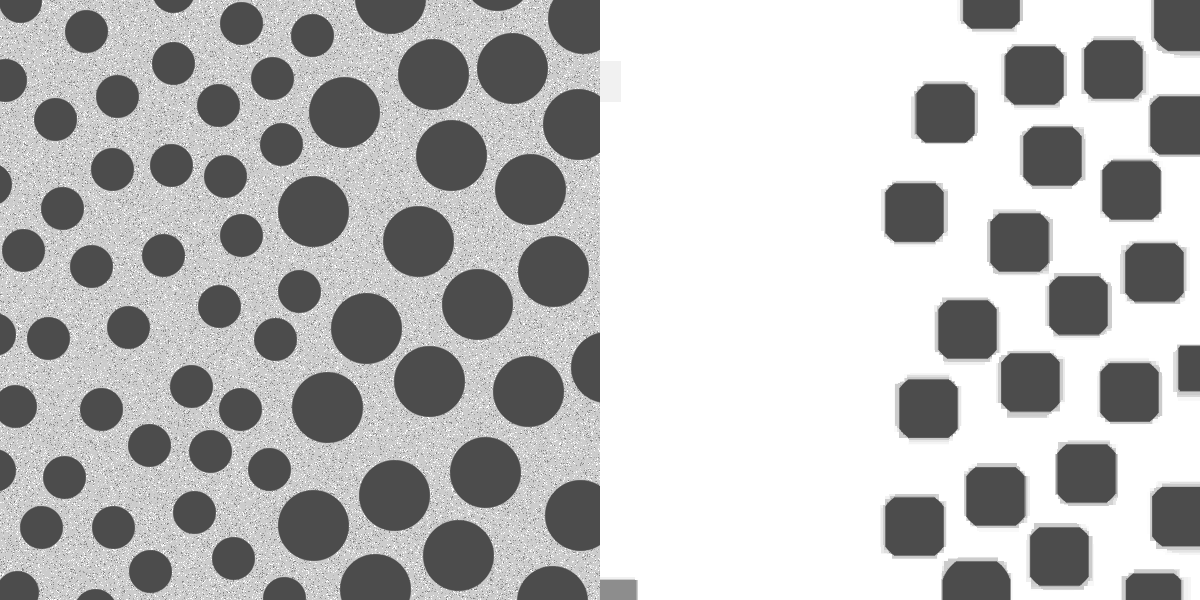

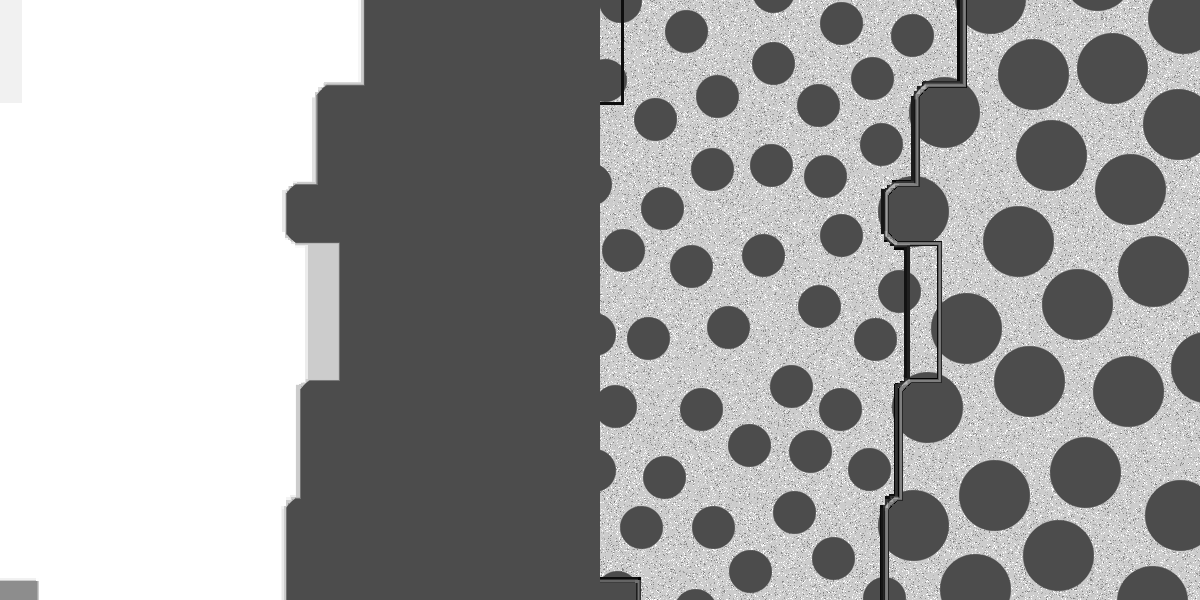

In [83]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기
img = cv.imread('HW2-10.tif')

# 두번째 이미지
kernel = np.ones((40,40), np.uint8)
img2 = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

# 세번째 이미지
kernel2=np.ones((134,134), np.uint8)
img3 = cv.morphologyEx(img2, cv.MORPH_OPEN, kernel2)

#네번째 이미지
kernel3=np.ones((4,4), np.uint8)
img4 = cv.morphologyEx(img3, cv.MORPH_GRADIENT, kernel3)
result4 = img.copy()
result4[img4 > 0] = img4[img4 > 0]


#출력
cv2_imshow(np.hstack((img,img2)))
cv2_imshow(np.hstack((img3,result4)))

